# Likelihood

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def likelihood(x, y, model, sigma, theta):
    suma = 0
    for i in range(len(x)):
        suma += (y[i] - model(x[i], theta))**2 / sigma[i]**2
    return -(1/2) * suma

In [5]:
# Define the model
def line(x, theta):
    return x*theta[0]+theta[1]

In [13]:
def montecarlo(x, y, model, sigmaY, p_old, pasosTotales, sigmaX):
    np.random.seed(500)
    L_old = likelihood(x, y, line, sigmaY, p_old)
    rechazado = 0
    
    markov_chain = [[p_old, L_old]]
    
    for paso in range(pasosTotales):
        p_new = [p_old[0] + sigmaX[0] * np.random.randn(), p_old[1] + sigmaX[1] * np.random.randn()]
        L_new = likelihood(x, y, line, sigmaY, p_new)
        
        if (L_new > L_old):
            markov_chain.append([p_new, L_new])
            p_old = p_new
            L_old = L_new
        elif (np.exp(L_new) / np.exp(L_old) > np.random.randn()):
            markov_chain.append([p_new, L_new])
            p_old = p_new
            L_old = L_new
        else:
            markov_chain.append([p_new, L_new])
            rechazado += 1
            
    return [markov_chain, rechazado]
    

In [14]:
theta = [10, 12]
sigmaX = [0.1, 0.1]

x = np.linspace(0, 10, 1000)
y = x*theta[0]+theta[1]
sigmaY = [0.1 for point in y]

chain = montecarlo(x, y, line, sigmaY, [8,8], 500, sigmaX)
ajuste = chain[0]
tazaAceptacion = len(ajuste)/(len(ajuste) + chain[1])

<ipython-input-13-3b6af0e885a5>:16: RuntimeWarning: invalid value encountered in double_scalars
  elif (np.exp(L_new) / np.exp(L_old) > np.random.randn()):


In [15]:
ajuste

[[[8, 8], -11470003.336669998],
 [[7.962263641926866, 8.016675891737698], -11775905.274951946],
 [[8.192137877323157, 7.980296320408548], -9891438.018870892],
 [[8.11615000159809, 7.771389684545551], -10794869.424851878],
 [[8.07036295911616, 7.8374058083300655], -11091445.360631466],
 [[8.308231878893968, 7.874182324282806], -9113601.729551064],
 [[8.16738186175963, 7.958137325346039], -10120711.729217596],
 [[8.134605387861162, 7.843463720510623], -10543027.631122144],
 [[8.391663791189545, 8.062728332742413], -8254733.748807108],
 [[8.435753561203551, 8.106715763452137], -7883063.740792327],
 [[8.54283023486943, 8.147140979139996], -7090038.400664148],
 [[8.556177408719167, 8.340851721025459], -6787160.498533758],
 [[8.656404949530268, 8.336151745804273], -6142805.369833322],
 [[8.771730918701037, 8.338150292419144], -5434992.241505743],
 [[8.613737873855209, 8.318366064374324], -6434050.441354211],
 [[8.745022529807999, 8.296937258536285], -5635525.044295298],
 [[8.938108631579324,

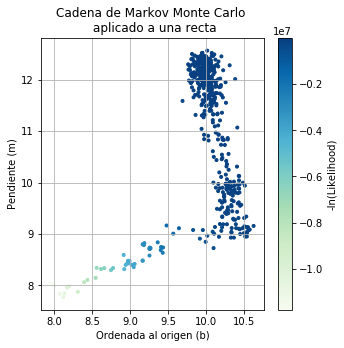

In [16]:
x = [punto[0] for punto, likelihood in ajuste]
y = [punto[1] for punto, likelihood in ajuste]
likelihoods = [likelihood for punto, likelihood in ajuste]

fig, ax0 = plt.subplots(figsize=(5, 5))

chain_plot = ax0.scatter(x, y, c = likelihoods,  cmap = 'GnBu', marker = '.')
ax0.plot()

ax0.set_ylabel('Pendiente (m)')
ax0.set_xlabel('Ordenada al origen (b)')
ax0.set_title('Cadena de Markov Monte Carlo \n aplicado a una recta') 

fig.colorbar(chain_plot, label='-ln(Likelihood)')

ax0.grid()